In [1]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Object-detection-model-evaluation/product/")
import numpy as np
import pickle

from matplotlib import pyplot as plt
from object_detection import ObjectDetect
from object_detection_utils import cal_recall_precision

In [13]:
def plot_recall_conf_curve(recall, thresholds):
    
    plt.plot(thresholds, recall, linewidth=2, color="red", zorder=0)
    plt.scatter(thresholds, recall)

    for i in range(len(thresholds)):
        plt.annotate("   %.2f"%thresholds[i], (thresholds[i], recall[i]))

    plt.xlabel("Confidence", fontsize=12, fontweight='bold')
    plt.ylabel("Recall", fontsize=12, fontweight='bold')
    plt.title("Recall-conf", fontsize=15, fontweight="bold")
    plt.show()

def plot_precision_conf_curve(precision, thresholds):
    
    plt.plot(thresholds, precision, linewidth=2, color="red", zorder=0)
    plt.scatter(thresholds, precision)

    for i in range(len(thresholds)):
        plt.annotate("   %.2f"%thresholds[i], (thresholds[i], precision[i]))

    plt.xlabel("Confidence", fontsize=12, fontweight='bold')
    plt.ylabel("Precision", fontsize=12, fontweight='bold')
    plt.title("Precision-conf", fontsize=15, fontweight="bold")
    plt.show()

def plot_precision_recall_curve(recall, precision, thresholds):
    
    plt.plot(recall, precision, linewidth=2, color="red", zorder=0)
    plt.scatter(recall, precision)

    for i in range(len(thresholds)):
        plt.annotate("   %.2f"%thresholds[i], (recall[i], precision[i]))

    plt.xlabel("Recall", fontsize=12, fontweight='bold')
    plt.ylabel("Precision", fontsize=12, fontweight='bold')
    plt.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
    plt.show()

In [3]:
# Thresholds used for evaluation (mentioned in the confg.ini during execution)
"""
cars_iou_th         = 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
cars_conf_th        = 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85
pedestrians_iou_th  = 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
pedestrians_conf_th = 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85
"""

'\ncars_iou_th         = 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5\ncars_conf_th        = 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85\npedestrians_iou_th  = 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5\npedestrians_conf_th = 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85\n'

In [4]:
result = ObjectDetect().predict()

2023-03-19 17:24:28,223 INFO    object_detection.py:24      : Loading the model


INFO:PalletDetection:Loading the model


2023-03-19 17:24:41,509 DEBUG   object_detection_load_model.py:21 : [<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]


DEBUG:PalletDetection:[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]


2023-03-19 17:24:41,519 DEBUG   object_detection_load_model.py:22 : {'detection_boxes': tf.float32, 'detection_classes': tf.float32, 'detection_scores': tf.float32, 'num_detections': tf.float32}


DEBUG:PalletDetection:{'detection_boxes': tf.float32, 'detection_classes': tf.float32, 'detection_scores': tf.float32, 'num_detections': tf.float32}


2023-03-19 17:24:41,526 DEBUG   object_detection_load_model.py:23 : {'detection_boxes': TensorShape([None, 100, 4]), 'detection_classes': TensorShape([None, 100]), 'detection_scores': TensorShape([None, 100]), 'num_detections': TensorShape([None])}


DEBUG:PalletDetection:{'detection_boxes': TensorShape([None, 100, 4]), 'detection_classes': TensorShape([None, 100]), 'detection_scores': TensorShape([None, 100]), 'num_detections': TensorShape([None])}


2023-03-19 17:24:41,531 INFO    object_detection.py:36      : Loading the dataset


INFO:PalletDetection:Loading the dataset


2023-03-19 17:24:41,559 INFO    object_detection_data.py:29 : Number of test images found: 100


INFO:PalletDetection:Number of test images found: 100


2023-03-19 17:24:41,572 DEBUG   object_detection_data.py:34 : Reading the images and their respective JSONs


DEBUG:PalletDetection:Reading the images and their respective JSONs


2023-03-19 17:24:43,639 INFO    object_detection.py:39      : Model prediction started


INFO:PalletDetection:Model prediction started


2023-03-19 17:24:43,643 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:24:43,655 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.200,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.200,  Cars-IOU threshold : 0.500


2023-03-19 17:24:43,663 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.200,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.200,  Pedst-IOU threshold: 0.500


2023-03-19 17:25:04,916 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 4.71


DEBUG:PalletDetection:Time taken for prediction: 4.71


2023-03-19 17:25:04,920 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:25:04,923 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:25:05,258 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:25:05,263 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:25:05,275 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:25:05,278 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:25:05,383 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.38, 0.47


DEBUG:PalletDetection:Car's evaluation: 0.38, 0.47


2023-03-19 17:25:05,387 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.23, 0.19


DEBUG:PalletDetection:Pedestrians's evaluation: 0.23, 0.19


2023-03-19 17:25:05,391 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:25:05,395 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.250,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.250,  Cars-IOU threshold : 0.500


2023-03-19 17:25:05,399 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.250,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.250,  Pedst-IOU threshold: 0.500


2023-03-19 17:25:13,439 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 12.44


DEBUG:PalletDetection:Time taken for prediction: 12.44


2023-03-19 17:25:13,448 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:25:13,452 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:25:13,907 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:25:13,916 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:25:13,926 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:25:13,931 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:25:14,017 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.41, 0.45


DEBUG:PalletDetection:Car's evaluation: 0.41, 0.45


2023-03-19 17:25:14,021 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.24, 0.18


DEBUG:PalletDetection:Pedestrians's evaluation: 0.24, 0.18


2023-03-19 17:25:14,029 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:25:14,033 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.300,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.300,  Cars-IOU threshold : 0.500


2023-03-19 17:25:14,039 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.300,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.300,  Pedst-IOU threshold: 0.500


2023-03-19 17:25:21,805 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 12.88


DEBUG:PalletDetection:Time taken for prediction: 12.88


2023-03-19 17:25:21,808 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:25:21,810 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:25:22,222 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:25:22,226 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:25:22,235 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:25:22,238 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:25:22,367 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.45, 0.43


DEBUG:PalletDetection:Car's evaluation: 0.45, 0.43


2023-03-19 17:25:22,370 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.24, 0.17


DEBUG:PalletDetection:Pedestrians's evaluation: 0.24, 0.17


2023-03-19 17:25:22,374 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:25:22,376 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.350,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.350,  Cars-IOU threshold : 0.500


2023-03-19 17:25:22,378 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.350,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.350,  Pedst-IOU threshold: 0.500


2023-03-19 17:25:29,771 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 13.53


DEBUG:PalletDetection:Time taken for prediction: 13.53


2023-03-19 17:25:29,778 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:25:29,781 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:25:30,108 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:25:30,114 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:25:30,126 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:25:30,130 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:25:30,195 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.49, 0.42


DEBUG:PalletDetection:Car's evaluation: 0.49, 0.42


2023-03-19 17:25:30,201 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.21, 0.15


DEBUG:PalletDetection:Pedestrians's evaluation: 0.21, 0.15


2023-03-19 17:25:30,208 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:25:30,214 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.400,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.400,  Cars-IOU threshold : 0.500


2023-03-19 17:25:30,220 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.400,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.400,  Pedst-IOU threshold: 0.500


2023-03-19 17:25:37,812 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 13.18


DEBUG:PalletDetection:Time taken for prediction: 13.18


2023-03-19 17:25:37,816 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:25:37,818 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:25:38,139 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:25:38,146 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:25:38,157 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:25:38,163 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:25:38,225 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.50, 0.41


DEBUG:PalletDetection:Car's evaluation: 0.50, 0.41


2023-03-19 17:25:38,232 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.21, 0.13


DEBUG:PalletDetection:Pedestrians's evaluation: 0.21, 0.13


2023-03-19 17:25:38,239 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:25:38,241 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.450,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.450,  Cars-IOU threshold : 0.500


2023-03-19 17:25:38,248 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.450,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.450,  Pedst-IOU threshold: 0.500


2023-03-19 17:25:44,687 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 15.54


DEBUG:PalletDetection:Time taken for prediction: 15.54


2023-03-19 17:25:44,692 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:25:44,694 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:25:45,028 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:25:45,034 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:25:45,046 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:25:45,052 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:25:45,105 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.53, 0.38


DEBUG:PalletDetection:Car's evaluation: 0.53, 0.38


2023-03-19 17:25:45,116 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.17, 0.12


DEBUG:PalletDetection:Pedestrians's evaluation: 0.17, 0.12


2023-03-19 17:25:45,123 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:25:45,130 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.500,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.500,  Cars-IOU threshold : 0.500


2023-03-19 17:25:45,135 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.500,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.500,  Pedst-IOU threshold: 0.500


2023-03-19 17:25:52,336 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 13.90


DEBUG:PalletDetection:Time taken for prediction: 13.90


2023-03-19 17:25:52,343 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:25:52,347 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:25:52,666 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:25:52,671 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:25:52,682 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:25:52,688 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:25:52,738 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.56, 0.36


DEBUG:PalletDetection:Car's evaluation: 0.56, 0.36


2023-03-19 17:25:52,744 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.18, 0.11


DEBUG:PalletDetection:Pedestrians's evaluation: 0.18, 0.11


2023-03-19 17:25:52,754 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:25:52,756 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.550,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.550,  Cars-IOU threshold : 0.500


2023-03-19 17:25:52,759 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.550,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.550,  Pedst-IOU threshold: 0.500


2023-03-19 17:25:59,174 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 15.60


DEBUG:PalletDetection:Time taken for prediction: 15.60


2023-03-19 17:25:59,181 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:25:59,185 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:25:59,510 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:25:59,517 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:25:59,525 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:25:59,529 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:25:59,574 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.56, 0.33


DEBUG:PalletDetection:Car's evaluation: 0.56, 0.33


2023-03-19 17:25:59,576 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.16, 0.10


DEBUG:PalletDetection:Pedestrians's evaluation: 0.16, 0.10


2023-03-19 17:25:59,583 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:25:59,589 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.600,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.600,  Cars-IOU threshold : 0.500


2023-03-19 17:25:59,593 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.600,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.600,  Pedst-IOU threshold: 0.500


2023-03-19 17:26:06,897 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 13.69


DEBUG:PalletDetection:Time taken for prediction: 13.69


2023-03-19 17:26:06,904 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:26:06,910 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:26:07,235 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:26:07,241 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:26:07,255 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:26:07,259 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:26:07,312 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.55, 0.30


DEBUG:PalletDetection:Car's evaluation: 0.55, 0.30


2023-03-19 17:26:07,315 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.16, 0.10


DEBUG:PalletDetection:Pedestrians's evaluation: 0.16, 0.10


2023-03-19 17:26:07,322 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:26:07,325 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.650,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.650,  Cars-IOU threshold : 0.500


2023-03-19 17:26:07,328 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.650,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.650,  Pedst-IOU threshold: 0.500


2023-03-19 17:26:13,662 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 15.79


DEBUG:PalletDetection:Time taken for prediction: 15.79


2023-03-19 17:26:13,669 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:26:13,676 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:26:14,122 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:26:14,126 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:26:14,137 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:26:14,144 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:26:14,204 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.55, 0.28


DEBUG:PalletDetection:Car's evaluation: 0.55, 0.28


2023-03-19 17:26:14,207 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.14, 0.09


DEBUG:PalletDetection:Pedestrians's evaluation: 0.14, 0.09


2023-03-19 17:26:14,210 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:26:14,213 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.700,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.700,  Cars-IOU threshold : 0.500


2023-03-19 17:26:14,218 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.700,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.700,  Pedst-IOU threshold: 0.500


2023-03-19 17:26:21,027 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 14.69


DEBUG:PalletDetection:Time taken for prediction: 14.69


2023-03-19 17:26:21,031 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:26:21,033 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:26:21,574 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:26:21,578 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:26:21,585 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:26:21,589 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:26:21,634 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.57, 0.25


DEBUG:PalletDetection:Car's evaluation: 0.57, 0.25


2023-03-19 17:26:21,636 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.14, 0.08


DEBUG:PalletDetection:Pedestrians's evaluation: 0.14, 0.08


2023-03-19 17:26:21,642 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:26:21,645 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.750,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.750,  Cars-IOU threshold : 0.500


2023-03-19 17:26:21,647 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.750,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.750,  Pedst-IOU threshold: 0.500


2023-03-19 17:26:28,307 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 15.02


DEBUG:PalletDetection:Time taken for prediction: 15.02


2023-03-19 17:26:28,311 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:26:28,312 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:26:28,753 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:26:28,763 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:26:28,771 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:26:28,778 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:26:28,831 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.52, 0.21


DEBUG:PalletDetection:Car's evaluation: 0.52, 0.21


2023-03-19 17:26:28,836 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.11, 0.06


DEBUG:PalletDetection:Pedestrians's evaluation: 0.11, 0.06


2023-03-19 17:26:28,840 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:26:28,843 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.800,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.800,  Cars-IOU threshold : 0.500


2023-03-19 17:26:28,846 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.800,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.800,  Pedst-IOU threshold: 0.500


2023-03-19 17:26:35,562 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 14.89


DEBUG:PalletDetection:Time taken for prediction: 14.89


2023-03-19 17:26:35,565 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:26:35,572 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:26:35,899 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:26:35,903 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:26:35,915 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:26:35,925 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:26:35,953 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.47, 0.17


DEBUG:PalletDetection:Car's evaluation: 0.47, 0.17


2023-03-19 17:26:35,963 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.10, 0.06


DEBUG:PalletDetection:Pedestrians's evaluation: 0.10, 0.06


2023-03-19 17:26:35,970 INFO    object_detection_load_model.py:137 : Running model evaluation for with following configurations


INFO:PalletDetection:Running model evaluation for with following configurations


2023-03-19 17:26:35,976 INFO    object_detection_load_model.py:138 : Cars-confidence threshold:  0.850,  Cars-IOU threshold : 0.500


INFO:PalletDetection:Cars-confidence threshold:  0.850,  Cars-IOU threshold : 0.500


2023-03-19 17:26:35,978 INFO    object_detection_load_model.py:140 : Pedst-confidence threshold: 0.850,  Pedst-IOU threshold: 0.500


INFO:PalletDetection:Pedst-confidence threshold: 0.850,  Pedst-IOU threshold: 0.500


2023-03-19 17:26:44,010 DEBUG   object_detection_load_model.py:41 : Time taken for prediction: 12.45


DEBUG:PalletDetection:Time taken for prediction: 12.45


2023-03-19 17:26:44,016 DEBUG   object_detection_load_model.py:42 : Model output shape: (100, 100, 4)


DEBUG:PalletDetection:Model output shape: (100, 100, 4)


2023-03-19 17:26:44,021 DEBUG   object_detection_load_model.py:45 : Categorizing the predictions


DEBUG:PalletDetection:Categorizing the predictions


2023-03-19 17:26:44,347 DEBUG   object_detection_load_model.py:50 : Number of categorized predictions: 100


DEBUG:PalletDetection:Number of categorized predictions: 100


2023-03-19 17:26:44,352 DEBUG   object_detection_load_model.py:53 : Filtering the predictions based on their confidence threshold


DEBUG:PalletDetection:Filtering the predictions based on their confidence threshold


2023-03-19 17:26:44,362 DEBUG   object_detection_load_model.py:65 : Number of predictions after filtration process: 100


DEBUG:PalletDetection:Number of predictions after filtration process: 100


2023-03-19 17:26:44,366 INFO    object_detection_load_model.py:82 : Calculating the TP, FP and FN of the predictions


INFO:PalletDetection:Calculating the TP, FP and FN of the predictions


2023-03-19 17:26:44,389 DEBUG   object_detection_load_model.py:109 : Car's evaluation: 0.44, 0.12


DEBUG:PalletDetection:Car's evaluation: 0.44, 0.12


2023-03-19 17:26:44,391 DEBUG   object_detection_load_model.py:112 : Pedestrians's evaluation: 0.05, 0.03


DEBUG:PalletDetection:Pedestrians's evaluation: 0.05, 0.03


2023-03-19 17:26:44,394 DEBUG   object_detection_load_model.py:167 : All configuration predictions done


DEBUG:PalletDetection:All configuration predictions done


2023-03-19 17:26:44,400 DEBUG   object_detection.py:47      : Result lengths: 14, 14, 14, 14, 14


DEBUG:PalletDetection:Result lengths: 14, 14, 14, 14, 14


2023-03-19 17:26:44,406 INFO    object_detection.py:106     : Average precision cars: 0.211


INFO:PalletDetection:Average precision cars: 0.211


2023-03-19 17:26:44,409 INFO    object_detection.py:107     : Average precision pedestrians: 0.091


INFO:PalletDetection:Average precision pedestrians: 0.091


2023-03-19 17:26:44,418 INFO    object_detection.py:108     : Mean-average-precision: 0.151


INFO:PalletDetection:Mean-average-precision: 0.151


In [5]:
result.keys()

dict_keys(['cars-recall', 'cars-precision', 'cars-avg-precision', 'pedestrians-avg-precision', 'map', 'pedestrians-recall', 'pedestrians-precision', 'cars-conf-threshold', 'cars-iou-threshold', 'pedestrians-conf-threshold', 'pedestrians-iou-threshold', 'model_inference_time', 'over_all_inference_time', 'tp_cars', 'fp_cars', 'fn_cars', 'tp_pedestrians', 'fp_pedestrians', 'fn_pedestrians'])

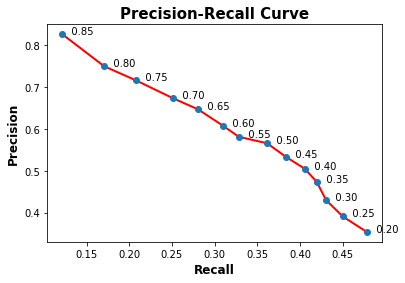

In [14]:
plot_precision_recall_curve(result["cars-recall"], result["cars-precision"], result["cars-conf-threshold"])

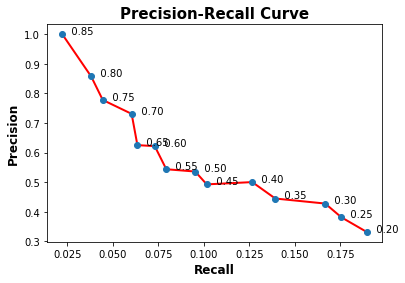

In [16]:
plot_precision_recall_curve(result["pedestrians-recall"], result["pedestrians-precision"], result["pedestrians-conf-threshold"])

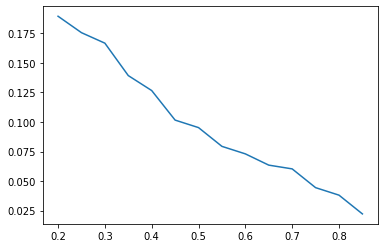

In [15]:
plt.plot(result["pedestrians-conf-threshold"],
         result["pedestrians-recall"])

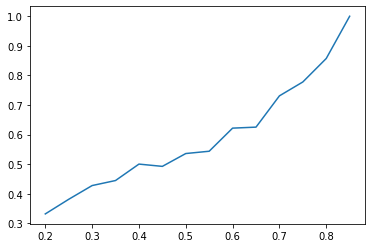

In [6]:
plt.plot(result["pedestrians-conf-threshold"],
         result["pedestrians-precision"])

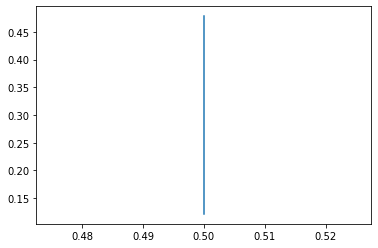

In [7]:
plt.plot(result["cars-conf-threshold"],
         result["cars-recall"])

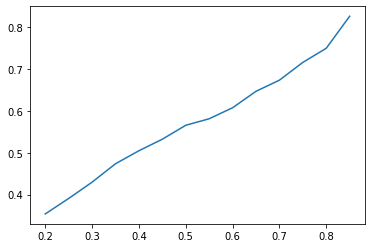

In [8]:
plt.plot(result["cars-conf-threshold"],
         result["cars-precision"])

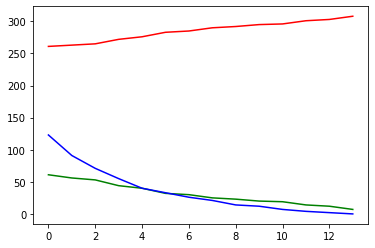

In [9]:
plt.plot(result["tp_pedestrians"], "g")
plt.plot(result["fp_pedestrians"], "b")
plt.plot(result["fn_pedestrians"], "r")

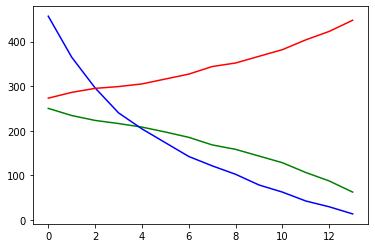

In [10]:
plt.plot(result["tp_cars"], "g")
plt.plot(result["fp_cars"], "b")
plt.plot(result["fn_cars"], "r")

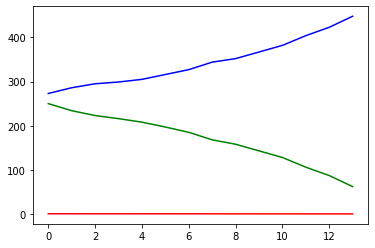

In [11]:
plt.plot(result["tp_cars"], "g")
plt.plot(result["fn_cars"], "b")
plt.plot(result["cars-recall"], "r")